In [27]:
import pandas as pd
import pymongo
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mc = pymongo.MongoClient()

survivor_db = mc['survivor_database']

season_collection = survivor_db['season_collection']
player_collection = survivor_db['player_collection']

In [3]:
seasons = pd.DataFrame(list(season_collection.find()))

In [4]:
seasons

,_id,name,num_initial_tribes,swap,num_players,returnee,num_finalist,hidden_immunity,final_four_fire,re_entrance
0,5db10a3f12fb7c89dc900c67,Borneo,2,False,16,False,2,False,False,False
1,5db10a3f12fb7c89dc900c68,The Australian Outback,2,False,16,False,2,False,False,False
2,5db10a3f12fb7c89dc900c69,Africa,3,True,16,False,2,False,False,False
3,5db10a3f12fb7c89dc900c6a,Marquesas,2,True,16,False,2,False,False,False
4,5db10a3f12fb7c89dc900c6b,Thailand,2,False,16,False,2,False,False,False
5,5db10a3f12fb7c89dc900c6c,The Amazon,2,True,16,False,2,False,False,False
6,5db10a3f12fb7c89dc900c6d,Pearl Islands,2,False,16,False,2,False,False,True
7,5db10a3f12fb7c89dc900c6e,All-Stars,3,True,18,True,2,False,False,False
8,5db10a3f12fb7c89dc900c6f,Vanuatu,2,True,18,False,2,False,False,False
9,5db10a3f12fb7c89dc900c70,Palau,2,False,20,False,2,False,False,False


In [5]:
seasons.drop('_id', axis=1, inplace=True)
seasons.head()

,name,num_initial_tribes,swap,num_players,returnee,num_finalist,hidden_immunity,final_four_fire,re_entrance
0,Borneo,2,False,16,False,2,False,False,False
1,The Australian Outback,2,False,16,False,2,False,False,False
2,Africa,3,True,16,False,2,False,False,False
3,Marquesas,2,True,16,False,2,False,False,False
4,Thailand,2,False,16,False,2,False,False,False


In [6]:
map_columns = ['swap', 'returnee', 'hidden_immunity', 'final_four_fire', 're_entrance']
for col in map_columns:
    seasons[col] = seasons[col].map({True: 1, False: 0})

In [7]:
seasons.head()

,name,num_initial_tribes,swap,num_players,returnee,num_finalist,hidden_immunity,final_four_fire,re_entrance
0,Borneo,2,0,16,0,2,0,0,0
1,The Australian Outback,2,0,16,0,2,0,0,0
2,Africa,3,1,16,0,2,0,0,0
3,Marquesas,2,1,16,0,2,0,0,0
4,Thailand,2,0,16,0,2,0,0,0


In [8]:
seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
name                  38 non-null object
num_initial_tribes    38 non-null int64
swap                  38 non-null int64
num_players           38 non-null int64
returnee              38 non-null int64
num_finalist          38 non-null int64
hidden_immunity       38 non-null int64
final_four_fire       38 non-null int64
re_entrance           38 non-null int64
dtypes: int64(8), object(1)
memory usage: 2.8+ KB


In [9]:
players = pd.DataFrame(list(player_collection.find()))

In [10]:
players.head(10)

,_id,name,age,season,placement,occupation,location,gender,race,returnee
0,5db1081212fb7c89dc9006db,Reem Daly,46,38,16,Sales,Virginia,F,Caucasian,False
1,5db1081212fb7c89dc9006dc,Keith Sowell,19,38,18,Student,North Carolina,M,Black,False
2,5db1081212fb7c89dc9006dd,Aubry Bracco,32,38,15,Marketing,California,F,Caucasian,True
3,5db1081212fb7c89dc9006de,Wendy Diaz,25,38,17,Entrepreneur,California,F,Latinx,False
4,5db1081212fb7c89dc9006df,Joe Anglim,29,38,14,Artist,Utah,M,Caucasian,True
5,5db1081212fb7c89dc9006e0,Eric Hafemann,34,38,13,Firefighter,California,M,Caucasian,False
6,5db1081212fb7c89dc9006e1,Julia Carter,25,38,12,Medical Student,Maryland,F,Black,False
7,5db1081212fb7c89dc9006e2,David Wright,44,38,11,Writer,California,M,Caucasian,True
8,5db1081212fb7c89dc9006e3,Kelley Wentworth,32,38,10,Marketing,Washington,F,Caucasian,True
9,5db1081212fb7c89dc9006e4,"Dan ""Wardog"" DaSilva",38,38,9,Law Student,California,M,Caucasian,False


In [11]:
players.drop('_id', axis=1, inplace=True)

In [12]:
players.drop_duplicates(inplace=True)

In [13]:
players.head()

,name,age,season,placement,occupation,location,gender,race,returnee
0,Reem Daly,46,38,16,Sales,Virginia,F,Caucasian,False
1,Keith Sowell,19,38,18,Student,North Carolina,M,Black,False
2,Aubry Bracco,32,38,15,Marketing,California,F,Caucasian,True
3,Wendy Diaz,25,38,17,Entrepreneur,California,F,Latinx,False
4,Joe Anglim,29,38,14,Artist,Utah,M,Caucasian,True


In [14]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 690
Data columns (total 9 columns):
name          691 non-null object
age           691 non-null int64
season        691 non-null int64
placement     691 non-null int64
occupation    691 non-null object
location      691 non-null object
gender        691 non-null object
race          691 non-null object
returnee      689 non-null object
dtypes: int64(3), object(6)
memory usage: 54.0+ KB


There is a mistake with two players where their returnee status is not listed. Find and correct them. 

In [15]:
print(players[players['returnee'].isnull()])

              name  age  season  placement      occupation    location  \
303  Russell Hantz   37      22         17  Business Owner       Texas   
529  Willard Smith   56      10         14          Lawyer  Washington   

         gender   race returnee  
303           M   True      NaN  
529  MCaucasian  False      NaN  


Looks like the race was accidentally dropped/shifted. So need to replace those as well as gender for Willard. Russell in season 22 is a returnee. Willard is not.

In [16]:
players.loc[(players['name'] =='Russell Hantz') & (players['season'] == 22), 'race'] = 'Caucasian'
players.loc[(players['name'] =='Russell Hantz') & (players['season'] == 22), 'returnee'] = 'True'
players.loc[players['name'] =='Willard Smith', 'gender'] = 'M'
players.loc[players['name'] =='Willard Smith', 'race'] = 'Caucasian'
players.loc[players['name'] =='Willard Smith', 'returnee'] = 'False'

Check that the correct changes occured.

In [17]:
players.loc[(players['name'] =='Willard Smith') | (players['name'] =='Russell Hantz')]

,name,age,season,placement,occupation,location,gender,race,returnee
303,Russell Hantz,37,22,17,Business Owner,Texas,M,Caucasian,True
357,Russell Hantz,36,20,3,Business Owner,Texas,M,Caucasian,True
378,Russell Hantz,36,19,2,Business Owner,Texas,M,Caucasian,False
529,Willard Smith,56,10,14,Lawyer,Washington,M,Caucasian,False


From creating the data set, I know there are some very uncommon jobs, I want to try to group some of the lower count jobs with larger groups.

In [18]:
dict(players['occupation'].value_counts())

{'Student': 43,
 'Sales': 34,
 'Lawyer': 29,
 'Business Owner': 23,
 'Pro Athlete': 20,
 'Police': 20,
 'Model': 19,
 'Bartender': 18,
 'Real Estate': 18,
 'Teacher': 17,
 'Fitness': 17,
 'Farmer': 16,
 'Firefighter': 15,
 'Law Student': 12,
 'Marketing': 11,
 'Actor': 11,
 'Coach': 11,
 'Physician': 11,
 'Nurse': 10,
 'Veteran': 10,
 'Waiter': 10,
 'Entrepreneur': 9,
 'Musician': 9,
 'Construction': 9,
 'Manager': 7,
 'Engineer': 6,
 'Writer': 6,
 'Artist': 5,
 'Finance': 5,
 'Consultant': 5,
 'Hairstylist': 5,
 'Poker Player': 5,
 'Mentor': 5,
 'Social Worker': 4,
 'Social Media': 4,
 'Animal Trainer': 4,
 'Chef': 4,
 'Medical Student': 4,
 'Homemaker': 4,
 'Motivational Speaker': 4,
 'Fisher': 4,
 'Mechanic': 4,
 'Military': 4,
 'Advertisting': 4,
 'Photographer': 3,
 'Boxer': 3,
 'Mailman': 3,
 'Chemist': 3,
 'News Anchor': 3,
 'Surfer': 3,
 'Dancer': 3,
 'Designer': 3,
 'Barista': 3,
 'Recruiter': 3,
 'Pilot': 3,
 'Accountant': 3,
 'Military Spouse': 3,
 'Banker': 2,
 'Buyer': 2,


Group together different types of guides as adventure guides.

In [19]:
# Test to make sure this method is valid
players['occupation'] = players['occupation'].replace({'Counstruction': 'Construction', 'Oil Driller': 'Construction',
                              'Disposal': 'Construction', 'Maintenance': 'Construction',
                              'Oil Tanker Crewman': 'Construction', 'Electrician': 'Construction',
                              'Lumberjack': 'Construction'})

In [20]:
dict(players['occupation'].value_counts())

{'Student': 43,
 'Sales': 34,
 'Lawyer': 29,
 'Business Owner': 23,
 'Police': 20,
 'Pro Athlete': 20,
 'Model': 19,
 'Bartender': 18,
 'Real Estate': 18,
 'Teacher': 17,
 'Fitness': 17,
 'Construction': 16,
 'Farmer': 16,
 'Firefighter': 15,
 'Law Student': 12,
 'Marketing': 11,
 'Physician': 11,
 'Actor': 11,
 'Coach': 11,
 'Waiter': 10,
 'Veteran': 10,
 'Nurse': 10,
 'Entrepreneur': 9,
 'Musician': 9,
 'Manager': 7,
 'Engineer': 6,
 'Writer': 6,
 'Consultant': 5,
 'Hairstylist': 5,
 'Finance': 5,
 'Artist': 5,
 'Poker Player': 5,
 'Mentor': 5,
 'Social Media': 4,
 'Advertisting': 4,
 'Motivational Speaker': 4,
 'Social Worker': 4,
 'Homemaker': 4,
 'Medical Student': 4,
 'Chef': 4,
 'Animal Trainer': 4,
 'Mechanic': 4,
 'Military': 4,
 'Fisher': 4,
 'Photographer': 3,
 'Boxer': 3,
 'Chemist': 3,
 'News Anchor': 3,
 'Barista': 3,
 'Surfer': 3,
 'Designer': 3,
 'Mailman': 3,
 'Dancer': 3,
 'Pilot': 3,
 'Recruiter': 3,
 'Accountant': 3,
 'Military Spouse': 3,
 'Business Consultant': 2,

In [21]:
# first run through of job consolidation
players['occupation'] = players['occupation'].replace({'Dental Student': 'Student', 
                                                       'Hiking Guide': 'Adventure Guide',
                                                       'Survival Instructor': 'Adventure Guide',
                                                       'Wilderness Guide': 'Adventure Guide',
                                                       'River Guide': 'Adventure Guide',
                                                       'Scout Leader': 'Adventure Guide',
                                                       'School Counselor': 'Therapist',
                                                       'Physical Therapist': 'Therapist',
                                                       'Music Therapist': 'Therapist',
                                                       'Nutritionist': 'Therapist',
                                                       'Massage Therapist': 'Therapist',
                                                       'Career Coach': 'Therapist',
                                                       'Hair Stylist': 'Beautician',
                                                      'Cosmetologist': 'Beautician',
                                                      'Hairstylist': 'Beautician',
                                                      'Makeup Artist': 'Beautician',
                                                      'Esthetician': 'Beautician',
                                                      'Stylist': 'Beautician',
                                                      'Showgirl': 'Entertainer',
                                                      'Talk Show Host': 'Entertainer',
                                                      'Comedian': 'Entertainer',
                                                      'Video Gamer': 'Entertainer',
                                                      'Viral Star': 'Entertainer',
                                                      'Musician': 'Entertainer',
                                                      'Dancer': 'Entertainer',
                                                      'Cheerleader': 'Entertainer',
                                                      'Pageant Queen': 'Entertainer',
                                                      'Roller Girl': 'Entertainer',
                                                      'Gamer': 'Entertainer',
                                                      'Broadcast': 'Entertainer',
                                                      'Boxer': 'Entertainer',
                                                      'Radio Host': 'Entertainer',
                                                      'News Anchor': 'Entertainer',
                                                      'Bus Driver': 'Driver',
                                                      'Limo Driver': 'Driver',
                                                      'Bounty Hunter': 'Law Enforcement',
                                                      'Police': 'Law Enforcement',
                                                      'Water Ski Instructor': 'Sport Instructor',
                                                      'Pageant Coach': 'Sport Instructor',
                                                      'Sailor': 'Sport Instructor',
                                                      'Surf Instructor': 'Sport Instructor'})

In [22]:
dict(players['occupation'].value_counts())

{'Student': 44,
 'Sales': 34,
 'Entertainer': 32,
 'Lawyer': 29,
 'Business Owner': 23,
 'Law Enforcement': 21,
 'Pro Athlete': 20,
 'Model': 19,
 'Bartender': 18,
 'Real Estate': 18,
 'Fitness': 17,
 'Teacher': 17,
 'Farmer': 16,
 'Construction': 16,
 'Firefighter': 15,
 'Beautician': 12,
 'Law Student': 12,
 'Coach': 11,
 'Actor': 11,
 'Physician': 11,
 'Marketing': 11,
 'Waiter': 10,
 'Nurse': 10,
 'Veteran': 10,
 'Entrepreneur': 9,
 'Therapist': 7,
 'Manager': 7,
 'Writer': 6,
 'Adventure Guide': 6,
 'Engineer': 6,
 'Artist': 5,
 'Poker Player': 5,
 'Mentor': 5,
 'Consultant': 5,
 'Finance': 5,
 'Medical Student': 4,
 'Sport Instructor': 4,
 'Social Media': 4,
 'Mechanic': 4,
 'Military': 4,
 'Chef': 4,
 'Social Worker': 4,
 'Animal Trainer': 4,
 'Fisher': 4,
 'Motivational Speaker': 4,
 'Advertisting': 4,
 'Homemaker': 4,
 'Accountant': 3,
 'Driver': 3,
 'Surfer': 3,
 'Designer': 3,
 'Pilot': 3,
 'Recruiter': 3,
 'Chemist': 3,
 'Photographer': 3,
 'Barista': 3,
 'Mailman': 3,
 'Mi

In [23]:
players['occupation'] = players['occupation'].replace({'Law Student': 'Student', 
                                                       'Actor': 'Entertainer',
                                                       'Entrepreneur': 'Business Owner', 
                                                       'Physician': 'Physician/Dentist', 
                                                       'Social Media': 'Marketing', 
                                                       'Advertisting': 'Marketing', 
                                                       'Nurse': 'Medical Professional', 
                                                       'Fisher': 'Agriculture',
                                                       'Rancher': 'Agriculture',
                                                       'Surfer': 'Sport Instructor',
                                                       'Tech Executive': 'Tech',
                                                       'Software Engineer': 'Tech',
                                                       'Computer Scientist': 'Tech',
                                                       'Missionary': 'Religion',
                                                       'Pastor': 'Religion',
                                                       'Legal Support': 'Law',
                                                      'Wrestler': 'Pro Athlete',
                                                      'FBI': 'Law Enforcement',
                                                      'Truck Driver': 'Driver',
                                                      'Business Consultant': 'Business', 
                                                       'Mortgage Loan Officer': 'Banker', 
                                                       'Career Counselor': 'Therapist',
                                                       'Professor': 'Education',
                                                      'Principal': 'Education',
                                                      'Equity Trade Manager': 'Finance',
                                                       'Judge': 'Law',
                                                      'Bellhop': 'Doorman',
                                                      'Waitress': 'Waiter',
                                                      'Nonprofit Owner': 'Nonprofit',
                                                      'Shopping Center Director': 'Real Estate',
                                                      'Mechanical Bull Operator/Model': 'Model',
                                                      'Loan Manager': 'Banker',
                                                      'Civil Engineer': 'Engineer',
                                                      'Robotics': 'Engineer',
                                                      'Phlebotomist': 'Medical Professional',
                                                      'Dentist': 'Physician/Dentist',
                                                       'Technology Executive': 'Tech',
                                                      'Author': 'Writer',
                                                      'Journalist': 'Writer',
                                                      'Water Treatment Tech': 'Construction',
                                                       'Architect': 'Construction'})

In [24]:
dict(players['occupation'].value_counts())

{'Student': 56,
 'Entertainer': 43,
 'Sales': 34,
 'Business Owner': 32,
 'Lawyer': 29,
 'Law Enforcement': 23,
 'Pro Athlete': 22,
 'Model': 20,
 'Real Estate': 19,
 'Marketing': 19,
 'Bartender': 18,
 'Construction': 18,
 'Teacher': 17,
 'Fitness': 17,
 'Farmer': 16,
 'Firefighter': 15,
 'Physician/Dentist': 12,
 'Beautician': 12,
 'Waiter': 11,
 'Medical Professional': 11,
 'Coach': 11,
 'Veteran': 10,
 'Therapist': 9,
 'Tech': 8,
 'Engineer': 8,
 'Writer': 8,
 'Sport Instructor': 7,
 'Manager': 7,
 'Adventure Guide': 6,
 'Agriculture': 6,
 'Finance': 6,
 'Artist': 5,
 'Consultant': 5,
 'Driver': 5,
 'Poker Player': 5,
 'Mentor': 5,
 'Banker': 4,
 'Mechanic': 4,
 'Medical Student': 4,
 'Military': 4,
 'Motivational Speaker': 4,
 'Social Worker': 4,
 'Education': 4,
 'Chef': 4,
 'Homemaker': 4,
 'Animal Trainer': 4,
 'Religion': 4,
 'Barista': 3,
 'Designer': 3,
 'Chemist': 3,
 'Recruiter': 3,
 'Mailman': 3,
 'Photographer': 3,
 'Law': 3,
 'Military Spouse': 3,
 'Business': 3,
 'Pilo

In [25]:
players['occupation'] = players['occupation'].replace({'Medical Student': 'Student', 
                                                       'Writer': 'Entertainer', 
                                                       'Teacher': 'Education',
                                                       'Farmer': 'Agriculture',
                                                       'Rocket Scientist': 'Engineer',
                                                       'Office Manager': 'Manager',
                                                       'Project Manager': 'Manager',
                                                       'Photographer': 'Artist',
                                                       'Videographer': 'Artist',
                                                       'Producer': 'Artist',
                                                       'Art Consultant': 'Artist',
                                                       'Shoe Designer': 'Designer',
                                                       'Executive': 'Business',
                                                       'Lawyer': 'Law',
                                                       'Account Manager': 'Accountant',
                                                       'Account Executive': 'Accountant',
                                                       'CEO': 'Business',
                                                       'Advocate': 'Mentor',
                                                       'Youth Director': 'Mentor',
                                                       'Program Director': 'Mentor',
                                                       'Steel Worker': 'Construction',
                                                       'Factory Worker': 'Construction',
                                                       'Sports President': 'Business Owner',
                                                       'Produce Clerk': 'Sales',
                                                       'Economics': 'Finance',
                                                       'Naturalist': 'Therapist',
                                                       'Snowboarder': 'Sport Instructor',
                                                       'Actuary': 'Insurance',
                                                       'Administrative Officer': 'Administration',
                                                       'Administrative Assistant': 'Administration',
                                                       'Assistant': 'Administration',
                                                       'Lunch Lady': 'Kitchen Staff',
                                                       'Chef': 'Kitchen Staff',
                                                       'Hedge Fund Support': 'Finance',
                                                       'Merchandiser': 'Buyer',
                                                       'Project Coordinator': 'Manager',
                                                       'Promoter': 'Event Planner'})

In [31]:
dict(players['occupation'].value_counts())

{'Student': 60,
 'Entertainer': 51,
 'Sales': 35,
 'Business Owner': 33,
 'Law': 32,
 'Law Enforcement': 23,
 'Pro Athlete': 22,
 'Agriculture': 22,
 'Education': 21,
 'Construction': 20,
 'Model': 20,
 'Marketing': 19,
 'Real Estate': 19,
 'Bartender': 18,
 'Fitness': 17,
 'Firefighter': 15,
 'Artist': 13,
 'Beautician': 12,
 'Physician/Dentist': 12,
 'Waiter': 11,
 'Coach': 11,
 'Manager': 11,
 'Medical Professional': 11,
 'Therapist': 10,
 'Engineer': 10,
 'Veteran': 10,
 'Mentor': 9,
 'Finance': 8,
 'Sport Instructor': 8,
 'Tech': 8,
 'Adventure Guide': 6,
 'Kitchen Staff': 6,
 'Business': 6,
 'Driver': 5,
 'Poker Player': 5,
 'Consultant': 5,
 'Accountant': 5,
 'Homemaker': 4,
 'Religion': 4,
 'Designer': 4,
 'Mechanic': 4,
 'Social Worker': 4,
 'Banker': 4,
 'Animal Trainer': 4,
 'Motivational Speaker': 4,
 'Military': 4,
 'Pilot': 3,
 'Administration': 3,
 'Mailman': 3,
 'Military Spouse': 3,
 'Chemist': 3,
 'Barista': 3,
 'Recruiter': 3,
 'Buyer': 3,
 'Nonprofit': 2,
 'Customer

At this point I believe I have consolidated jobs that are very similar into smaller categories.

In [36]:
occupation_counts = dict(players['occupation'].value_counts())

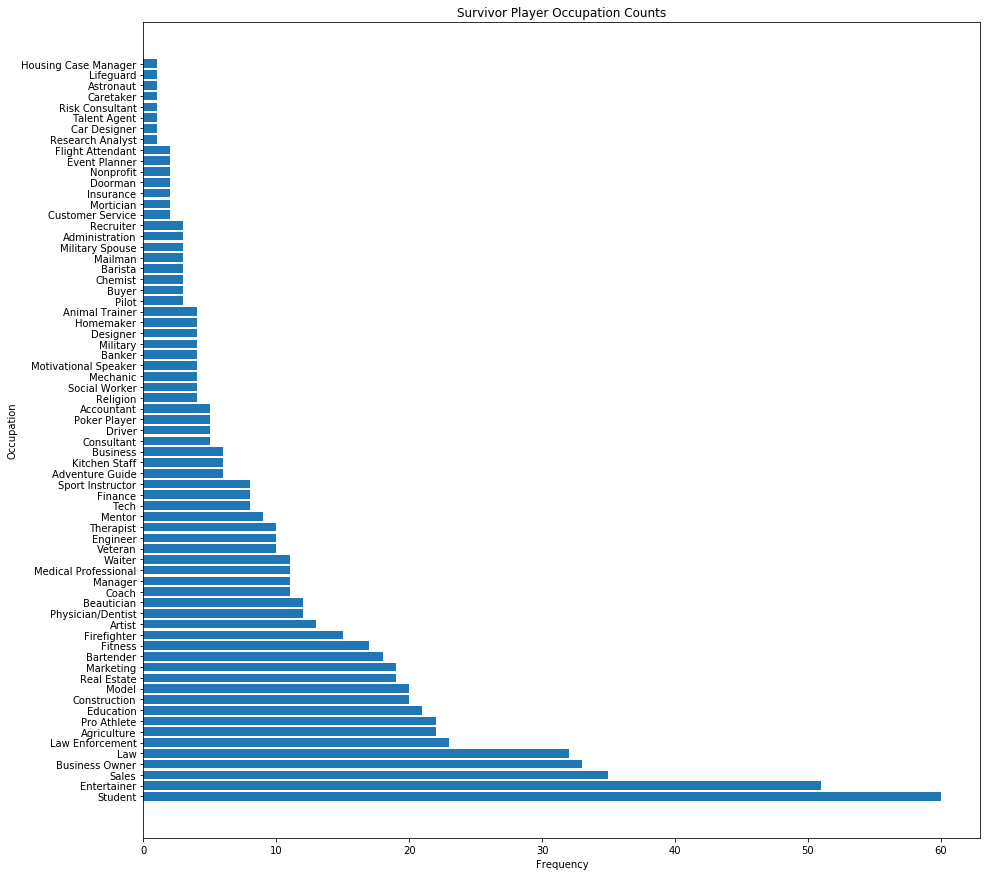

In [51]:
fig = plt.figure(figsize=(15,15))
plt.barh(list(occupation_counts.keys()), list(occupation_counts.values()))
plt.xlabel('Frequency')
plt.ylabel('Occupation')
plt.title('Survivor Player Occupation Counts')
plt.show();

Text(0.5, 1.0, 'Survivor Players by Race')

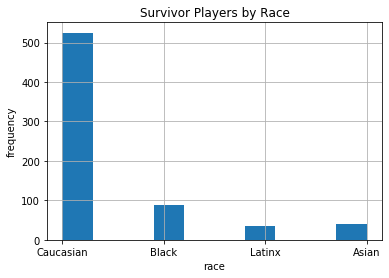

In [57]:
ax = players['race'].hist()
ax.set_xlabel('race')
ax.set_ylabel('frequency')
ax.set_title('Survivor Players by Race')

Text(0.5, 1.0, 'Survivor Players by Gender')

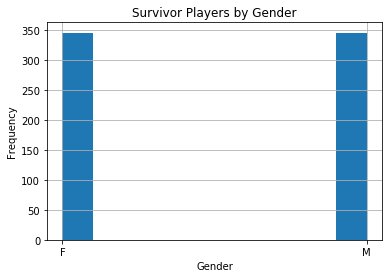

In [58]:
ax = players['gender'].hist()
ax.set_xlabel('Gender')
ax.set_ylabel('Frequency')
ax.set_title('Survivor Players by Gender')

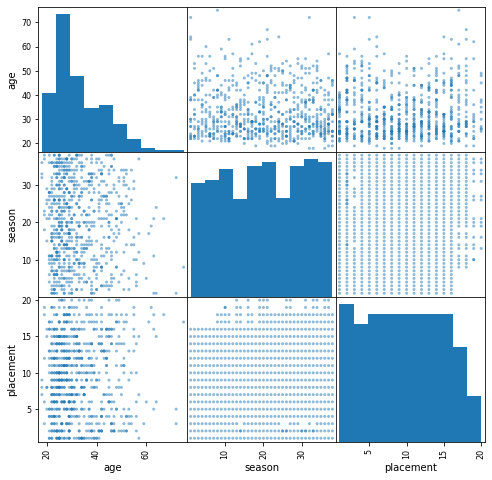

In [62]:
pd.plotting.scatter_matrix(players, figsize=(8,8));

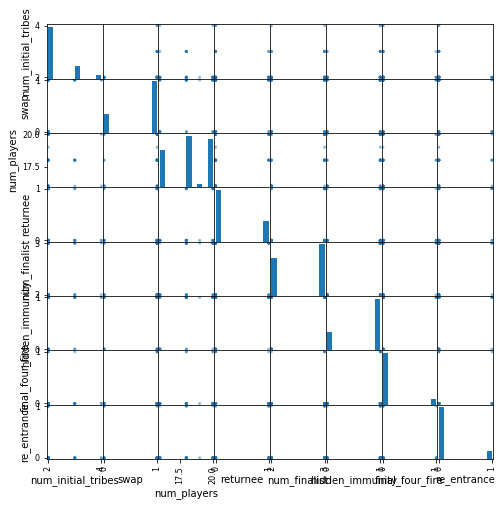

In [64]:
pd.plotting.scatter_matrix(seasons, figsize=(8,8));

Since not every season has the same number of players, the placement rank does not really have a meaning. I will join the dataframes and then adjust the placement to be a value between 0 and 1. Where a 1 indicates being the first voted out (20th out of 20) and a small number (but not zero since it is impossible) indicates a higher placement.

In [65]:
seasons.index += 1
seasons.head()

,name,num_initial_tribes,swap,num_players,returnee,num_finalist,hidden_immunity,final_four_fire,re_entrance
1,Borneo,2,0,16,0,2,0,0,0
2,The Australian Outback,2,0,16,0,2,0,0,0
3,Africa,3,1,16,0,2,0,0,0
4,Marquesas,2,1,16,0,2,0,0,0
5,Thailand,2,0,16,0,2,0,0,0


In [68]:
playerplayers.join(seasons, on='season', rsuffix='_season')

,name,age,season,placement,occupation,location,gender,race,returnee,name_season,num_initial_tribes,swap,num_players,returnee_season,num_finalist,hidden_immunity,final_four_fire,re_entrance
0,Reem Daly,46,38,16,Sales,Virginia,F,Caucasian,False,Edge of Extinction,2,1,18,1,3,1,1,1
1,Keith Sowell,19,38,18,Student,North Carolina,M,Black,False,Edge of Extinction,2,1,18,1,3,1,1,1
2,Aubry Bracco,32,38,15,Marketing,California,F,Caucasian,True,Edge of Extinction,2,1,18,1,3,1,1,1
3,Wendy Diaz,25,38,17,Business Owner,California,F,Latinx,False,Edge of Extinction,2,1,18,1,3,1,1,1
4,Joe Anglim,29,38,14,Artist,Utah,M,Caucasian,True,Edge of Extinction,2,1,18,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,Sean Kenniff,30,1,5,Physician/Dentist,New Jersey,M,Caucasian,False,Borneo,2,0,16,0,2,0,0,0
687,Sue Hawk,38,1,4,Driver,Wisconsin,F,Caucasian,False,Borneo,2,0,16,0,2,0,0,0
688,Rudy Boesch,72,1,3,Veteran,Virginia,M,Caucasian,False,Borneo,2,0,16,0,2,0,0,0
689,Kelly Wiglesworth,22,1,2,Adventure Guide,Nevada,F,Caucasian,False,Borneo,2,0,16,0,2,0,0,0
